In [17]:
import pandas as pd
import polars as pl
from matplotlib import pyplot as plt
import seaborn as sns

In [18]:
url="https://raw.githubusercontent.com/labdatos-se/pacic/main/datos/productos_limpia.csv"

In [19]:
df=pl.read_csv(url)
#Convertir a pandas
df=df.to_pandas()
#Sustituir "+" por " " en la columna "busqueda"
df["busqueda"]=df["busqueda"].str.replace("+"," ")
df

C:\Users\claud\AppData\Local\Temp\ipykernel_26296\2934744466.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["busqueda"]=df["busqueda"].str.replace("+"," ")


,id_tienda,sucursal,store_name,marca,producto,precio,contenido,busqueda,latitud,longitud,address
0,1445,Pedregal,Selecto Chedraui,Chedraui,tortilla amarilla,12.8,"a granel, precio por kg",tortilla de maíz,19.335124,-99.198477,Av. San Jerónimo 236
1,4414,La Comer Coyoacán,La Comer,None,tortilla de maíz amarilla,14.9,"a granel, precio por kg",tortilla de maíz,19.345009,-99.171911,"MIGUEL ANGEL DE QUEVEDO 443, ROMERO DE TERRERO..."
2,4414,La Comer Coyoacán,La Comer,F/m,tortilla de maíz azul,18.9,"a granel, precio por kg",tortilla de maíz,19.345009,-99.171911,"MIGUEL ANGEL DE QUEVEDO 443, ROMERO DE TERRERO..."
3,4414,La Comer Coyoacán,La Comer,None,tortilla taquera maíz azul,17.5,"precio por kg, unidad: 1 kg aprox",tortilla de maíz,19.345009,-99.171911,"MIGUEL ANGEL DE QUEVEDO 443, ROMERO DE TERRERO..."
4,4414,La Comer Coyoacán,La Comer,None,masa de maíz blanco,15.0,"a granel, precio por kg",tortilla de maíz,19.345009,-99.171911,"MIGUEL ANGEL DE QUEVEDO 443, ROMERO DE TERRERO..."
...,...,...,...,...,...,...,...,...,...,...,...
8789,26722,Chedraui Tepozán,Chedraui,Depend,toalla para incontinencia femenine,55.1,paquete 10 piezas,toalla femenina,19.362166,-98.988547,Av. Tepozanes No. 3 Entre Tabachines Y Siervo ...
8790,26722,Chedraui Tepozán,Chedraui,Depend,toalla femenine manzanilla,49.9,paquete 10 piezas,toalla femenina,19.362166,-98.988547,Av. Tepozanes No. 3 Entre Tabachines Y Siervo ...
8791,26722,Chedraui Tepozán,Chedraui,Depend,toalla anatómica femenine,45.5,paquete 10 piezas,toalla femenina,19.362166,-98.988547,Av. Tepozanes No. 3 Entre Tabachines Y Siervo ...
8792,26722,Chedraui Tepozán,Chedraui,Tena,protectores lady discret nocturnos,82.0,paquete 8 piezas,toalla femenina,19.362166,-98.988547,Av. Tepozanes No. 3 Entre Tabachines Y Siervo ...


In [20]:
#Filtrar si la busqueda es arroz
arroz=df[df['busqueda']=='arroz']
#Eliminar todos los productos si busqueda es arroz en df
df=df[df['busqueda']!='arroz']
#Dejar solo los que contengan "arroz" en producto en tabla arroz
arroz=arroz[arroz['producto'].str.contains("arroz")]
#Pegar las dos tablas
df=pd.concat([df,arroz])

In [21]:
#Filtrar si la busqueda es pasta
pasta=df[df['busqueda']=='pasta para sopa']
df=df[df['busqueda']!='pasta para sopa']
pasta=pasta[~pasta["producto"].str.contains("organica")]
df=pd.concat([df,pasta])
len(df)

8678

In [22]:
df.groupby("store_name").size().sort_values(ascending=False)

store_name
Soriana             3132
La Comer            2277
Chedraui            1763
Selecto Chedraui    1506
dtype: int64

In [23]:
#Salvar a excel
df.to_excel("D:/productos_limpia.xlsx", index=False)

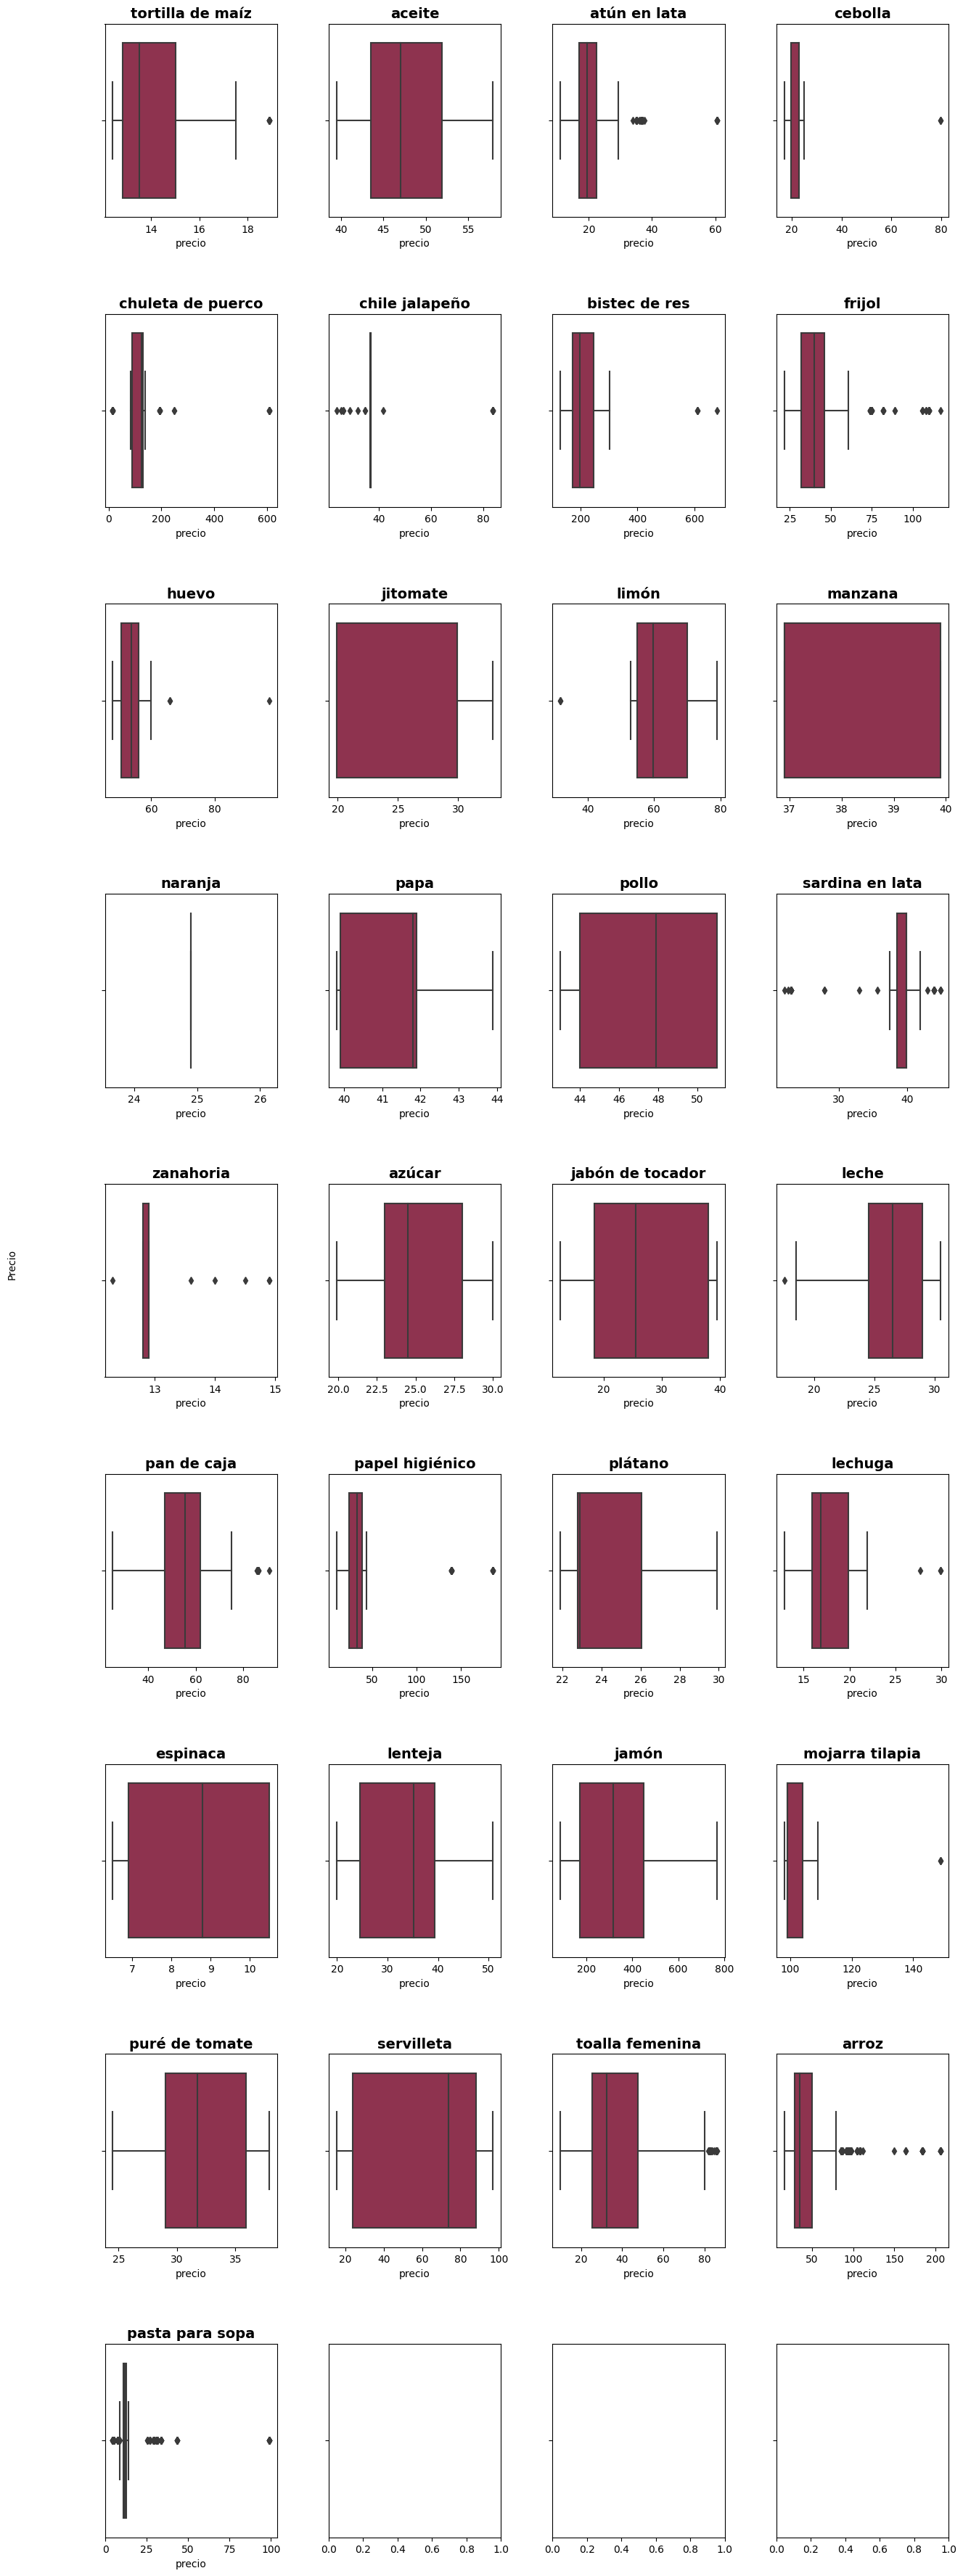

In [30]:
# Assuming your DataFrame is called `df` and the column containing the products is called `busqueda`
# Get a list of unique products in the DataFrame
products = df['busqueda'].unique()


# Determine the number of rows and columns for the subplots
num_rows = len(products) // 4+ len(products) % 4 # Round up to the nearest integer
num_cols = 4

# Create a figure with subplots for each product
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,5*num_rows), sharey=True)

# Loop through the products and create a boxplot in each subplot
for i, product in enumerate(products):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x='precio', data=df[df['busqueda']==product], ax=axs[row, col],color='#9d2449')
    axs[row, col].set_title(product, fontsize=14, fontweight='bold')
    # Set title and labels

# Set the y-axis label
fig.text(0.04, 0.5, 'Precio', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(wspace=0.3, hspace=0.5)


# Show the plot
plt.show()


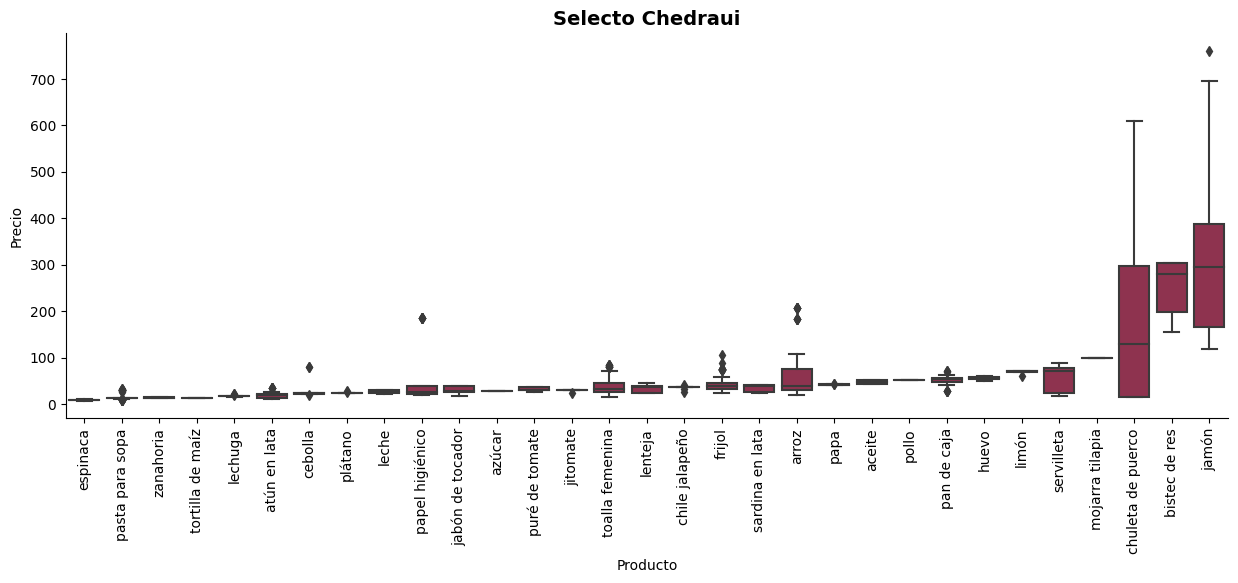

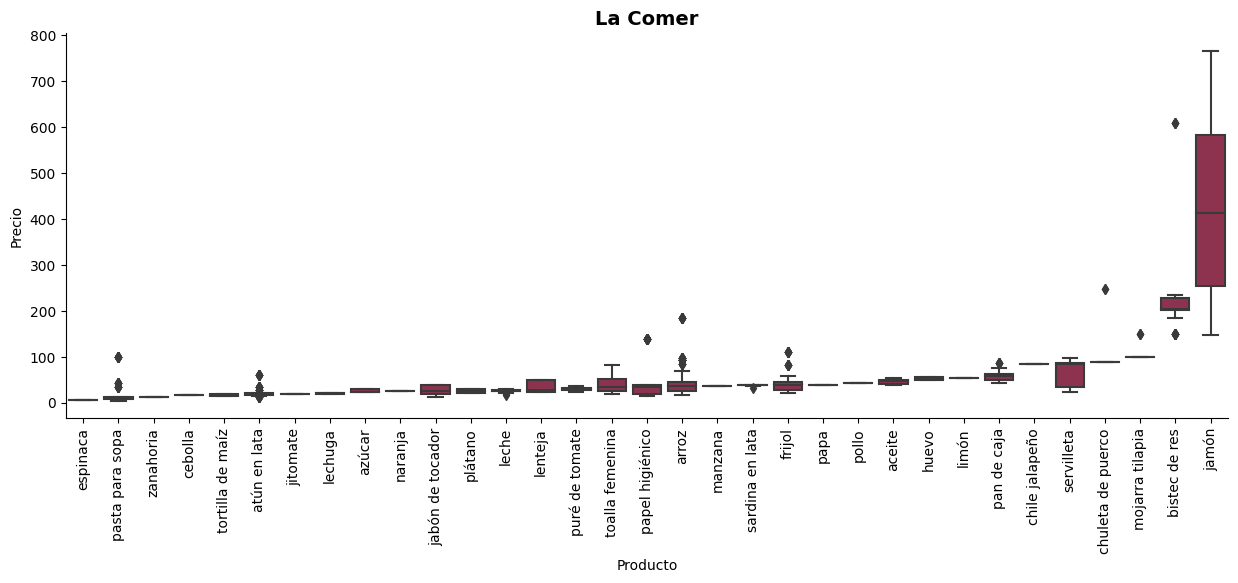

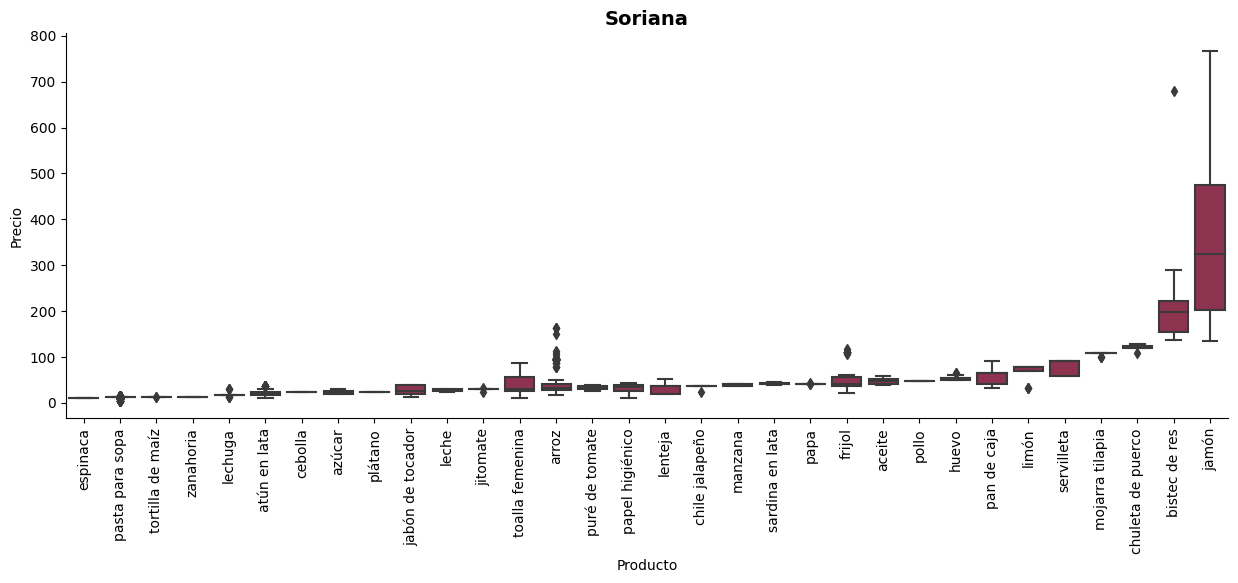

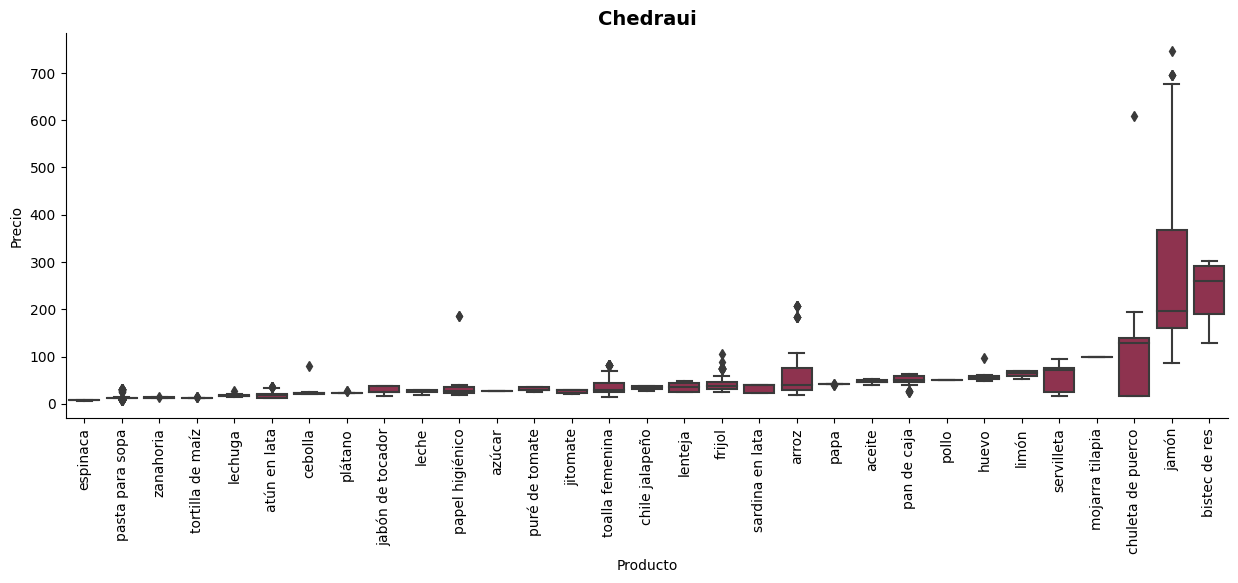

In [25]:
for supermercado in df['store_name'].unique():
    # Get the data for the current store name
    data = df[df['store_name'] == supermercado]

    # Sort the data by median price
    median_prices = data.groupby('busqueda')['precio'].median().sort_values()
    data_sorted = data.set_index('busqueda').loc[median_prices.index].reset_index()
    fig, ax = plt.subplots(figsize=(15,5))
    # Create the boxplot using seaborn
    sns.boxplot(x='busqueda', y='precio', data=data_sorted, color='#9d2449')

    # Set the title
    plt.title(supermercado, fontsize=14, fontweight='bold')

    # Set the x-axis label
    plt.xlabel('Producto')

    # Set the y-axis label
    plt.ylabel('Precio')

    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    plt.gca().spines["top"].set_visible(False)  
    plt.gca().spines["right"].set_visible(False)

    # Show the plot for the current store name
    plt.show()
